In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [20]:
# 定义STD因子函数
def std_factor(df, n=60):
    """
    计算STD因子：过去n天收盘价标准差除以最新收盘价
    
    参数:
    df: 包含OHLCV数据的DataFrame
    n: 滚动窗口大小 (默认20)
    """
    # 计算滚动标准差
    rolling_std = df['close'].rolling(window=n).std()
    
    # 除以最新收盘价
    factor = rolling_std / df['close']
    
    return factor

# 因子测试

In [21]:
evaluator.set_factor(
    factor_func=std_factor,
    factor_name='std_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.012029
   Rank_IC (Spearman): 0.017814
📊 信息比率:
   IR: 0.070345
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130837
   因子列: std_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


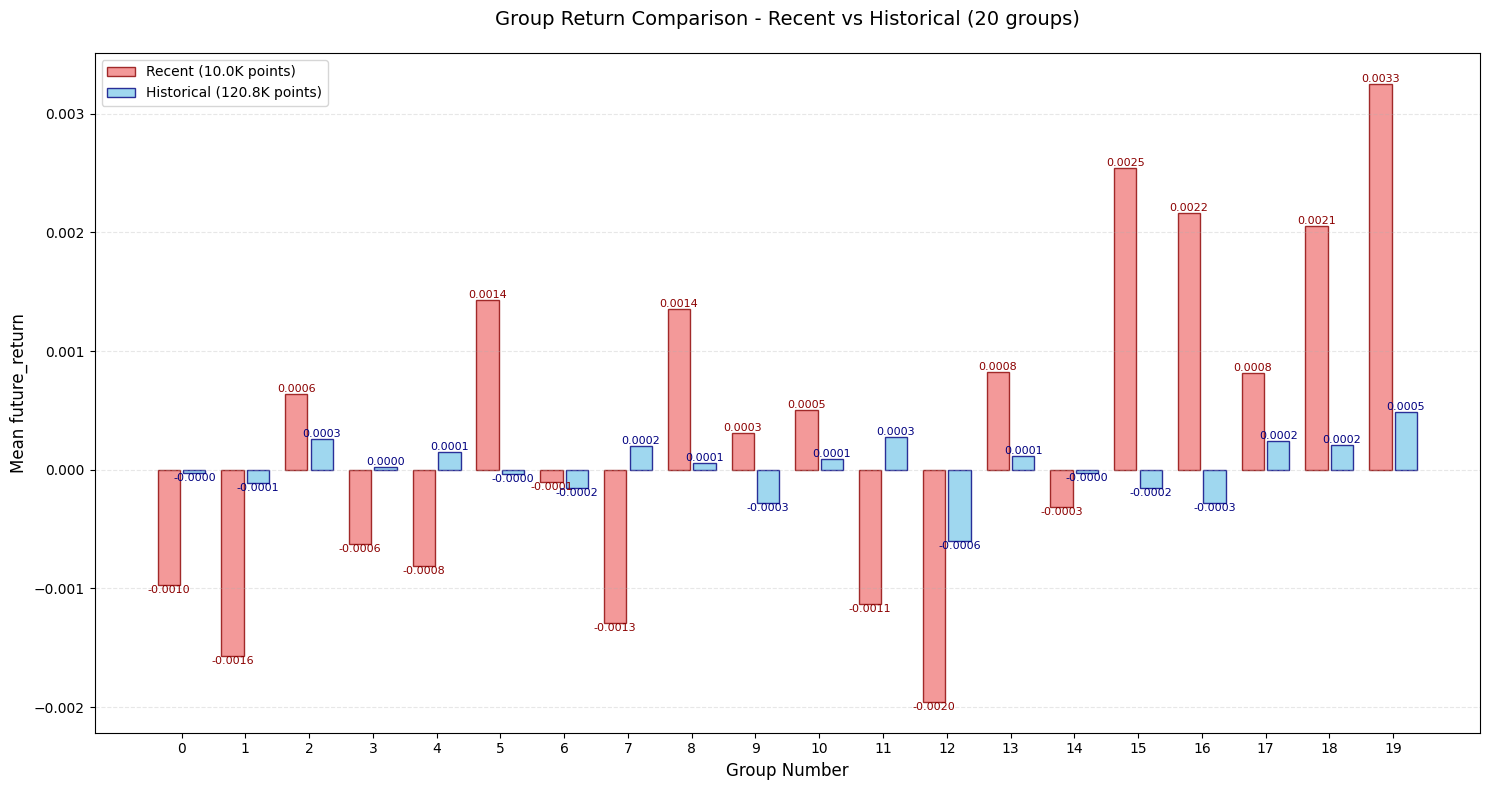

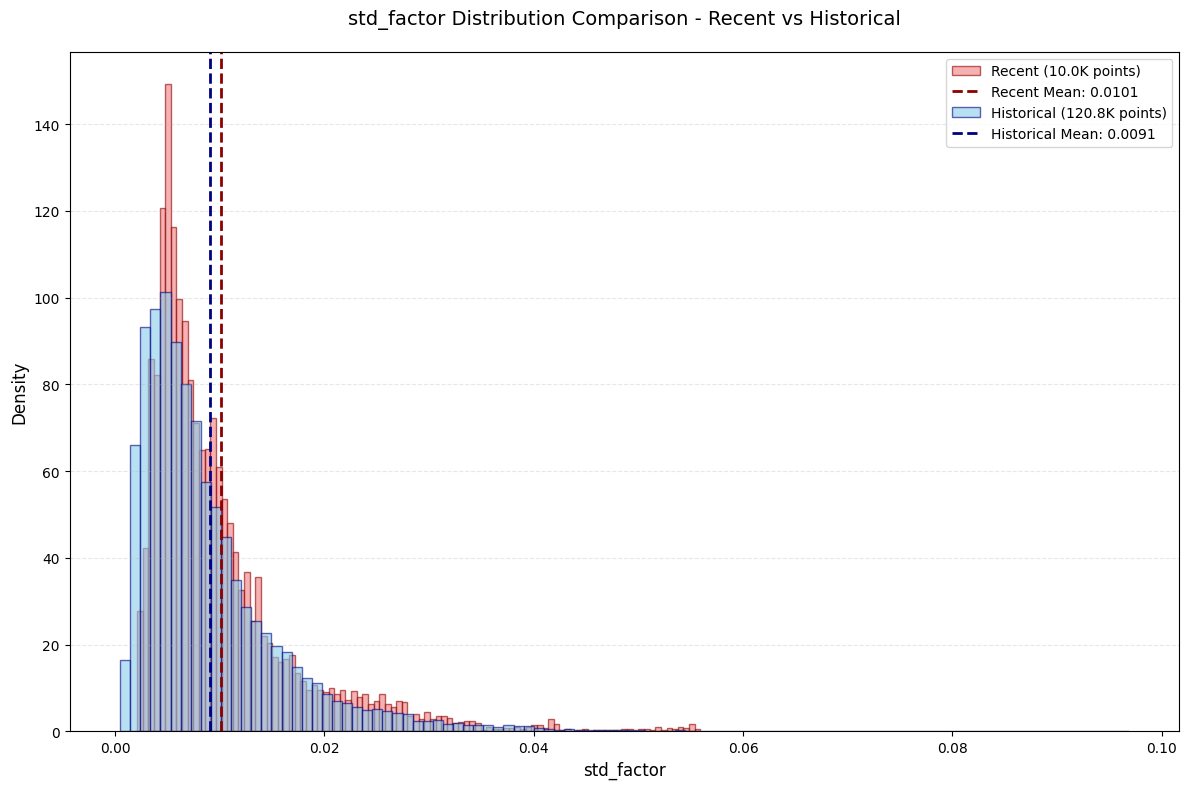

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [22]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

In [23]:
import matplotlib.pyplot as plt
plt.scatter(volatility_adjusted_smart_money(df),df['close'].pct_change(-10), s=0.3)

NameError: name 'volatility_adjusted_smart_money' is not defined

In [ ]:
result['information_ratio']['group_correlations']

[-0.005235727091116045,
 -0.004460840798364955,
 -0.0039413291206267615,
 -0.0031900002611649405,
 -0.0022127017420378588,
 0.010764588458755211,
 -0.015689603227456,
 0.010682380555370347,
 0.0022818335888591073,
 0.03598557690800088]

In [ ]:
print(result)

{'correlation_analysis': {'IC': 0.020940265168231373, 'Rank_IC': -0.02285916767553561}, 'information_ratio': {'IR': 0.18664569619934435, 'group_correlations': [-0.005235727091116045, -0.004460840798364955, -0.0039413291206267615, -0.0031900002611649405, -0.0022127017420378588, 0.010764588458755211, -0.015689603227456, 0.010682380555370347, 0.0022818335888591073, 0.03598557690800088], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0     -33.1798  -4.7304   -6.2742      -0.0008      0.0169   6505
1      -4.7299  -3.5343   -4.0738      -0.0004      0.0132   6504
2      -3.5343  -2.8138   -3.1496       0.0003      0.0129   6504
3      -2.8138  -2.2578   -2.5270       0.0002      0.0120   6504
4      -2.2577  -1.7956   -2.0214      -0.0002      0.0116   6504
5      -1.7954  -1.3994   -1.5946      -0.0001      0.0109   6504
6      -1.3993  -1.0460   -1.2209 